In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Placeholder for privacy reasons
dataset = pd.read_csv('dataset name')

In [3]:
dataset.dtypes["Amount Awarded"]

dtype('float64')

In [4]:
dataset.isna().sum()["Amount Awarded"]

27

In [5]:
# More data cleaning
sum_num = 0
for value in dataset["Amount Awarded"]:
    whole_num = str(value)[:-3]
    num = whole_num.replace(',','')
    if num != '':
        sum_num += int(num)
print(sum_num)

16673


In [6]:
# Conversion to integers for data cleaning - if necessary
def to_integer(value):
    sum_num = 0
    whole_num = str(value)[:-3]
    num_list = list(whole_num)
    if ',' in num_list:
        num_list.remove(',')
    string = ""
    for num in num_list:
        string += num
    return int(string)

In [7]:
# Find n-values of each ethnicity
import math
n_vals = {}
df = dataset[["Ethnicity", "Amount Awarded"]]
new_df = df.dropna(subset=["Ethnicity"], inplace=False)
for ethnicity in new_df["Ethnicity"]:
    if ethnicity in n_vals:
        n_vals[ethnicity] += 1
    else:
        n_vals[ethnicity] = 1
print(n_vals)

{'Caucasian': 19, 'Middle Eastern/Arab': 6, 'Asian': 25, 'Hispanic': 16, 'Black': 21, 'Inter-racial': 4}


In [22]:
# Find averages for each ethnicity - with data cleaning
unique = list(new_df["Ethnicity"].unique())
print(unique)
avg_list = []
for ethnicity in unique:
    ethnicity_df = new_df[new_df["Ethnicity"] == ethnicity]
    money_list = list(ethnicity_df["Amount Awarded"])
    print(money_list)
    int_list = []
    for value in money_list:
        num = str(value)[-2:]
        if num == '.0':
            int_list.append(to_integer(value))
    sum_num = 0
    for num in int_list:
        sum_num += num
    if len(money_list) > 0:
        avg_list.append(sum_num / len(money_list))
print(avg_list)

['Caucasian', 'Middle Eastern/Arab', 'Asian', 'Hispanic', 'Black', 'Inter-racial']
[3750.0, 3000.0, 1440.0, 5000.0, 1200.0, 1068.0, 1000.0, 1500.0, nan, 2775.0, 2199.0, 3034.0, 3034.0, 2240.0, nan, 5000.0, nan, 468.0, nan]
[1086.0, 534.0, 5000.0, 5000.0, 2700.0, 534.0]
[nan, 534.0, 3300.0, 1068.0, 534.0, 534.0, 5000.0, 5000.0, nan, 3000.0, 3000.0, 3000.0, nan, 5000.0, 224.0, 224.0, nan, 224.0, 4500.0, 801.0, nan, 534.0, 500.0, 3320.0, 5000.0]
[534.0, 534.0, nan, nan, nan, 2700.0, 4550.0, 5000.0, nan, 1000.0, 1000.0, 5000.0, 5000.0, 1440.0, 3334.0, nan]
[5000.0, nan, 5000.0, nan, 1800.0, 5000.0, nan, nan, nan, nan, nan, nan, nan, 4200.0, 500.0, 500.0, 534.0, nan, 534.0, 534.0, 5000.0]
[nan, nan, 5000.0, 5000.0]
[193.0, 247.33333333333334, 181.04, 188.0, 136.14285714285714, 250.0]


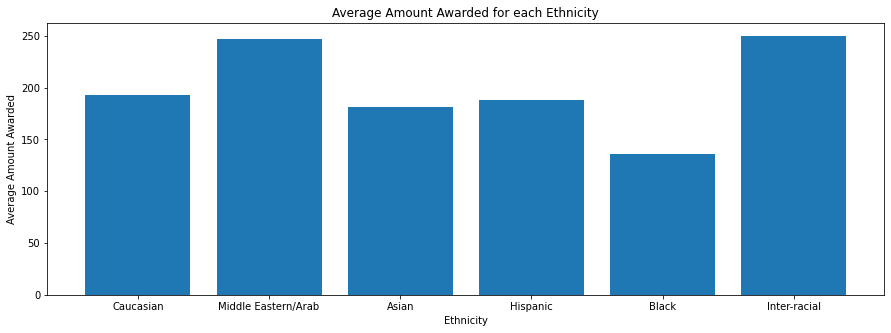

In [23]:
# Generate plot
fig = plt.figure(figsize = (15, 5))
plt.xlabel("Ethnicity")
plt.ylabel("Average Amount Awarded")
plt.title("Average Amount Awarded for each Ethnicity")
plt.bar(unique, avg_list, width = 0.8)
plt.show()